In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
time=200
lamda=0

def get_data(filename):
    data = load_svmlight_file(filename, n_features=123)
    return data[0], data[1]

def P(z):
    return (1/(1+np.exp(-z)))

def Accuracy(X_test,w):
    t = P(X_test.dot(w.T)) > 0.5   
    count=0
    for n in range(X_test.shape[0]):
        if t[n][0] == False and y_test[n]== -1:
            count = count + 1
        elif t[n][0] == True and y_test[n]== 1:
            count = count + 1

    return (count / y_test.shape[0])

X_train,y_train=get_data('a9a.txt')
X_test,y_test=get_data('a9atest.txt')

X_train=np.hstack([X_train.toarray(),np.ones((X_train.shape[0],1))])
X_test=np.hstack([X_test.toarray(),np.ones((X_test.shape[0],1))])

In [2]:
# 梯度下降
'''
loss_GDhistory=[]
w=0.001*np.random.random((1,124))
for k in range(time):
    GDloss=np.mean(np.log(1+np.exp(-y_train.reshape(-1,1)*(X_train.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    dw = lamda*w - np.mean((y_train.reshape(-1,1) * X_train)/(1 + np.exp(y_train.reshape(-1,1) * X_train.dot(w.T))), axis = 0, keepdims = True)
    w=w-learning_rate*dw
    loss_GDhistory.append(GDloss)
'''

'\nloss_GDhistory=[]\nw=0.001*np.random.random((1,124))\nfor k in range(time):\n    GDloss=np.mean(np.log(1+np.exp(-y_train.reshape(-1,1)*(X_train.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)\n    dw = lamda*w - np.mean((y_train.reshape(-1,1) * X_train)/(1 + np.exp(y_train.reshape(-1,1) * X_train.dot(w.T))), axis = 0, keepdims = True)\n    w=w-learning_rate*dw\n    loss_GDhistory.append(GDloss)\n'

In [3]:
# 随机梯度下降
'''
loss_SGDhistory=[]
w=0.001*np.random.random((1,124))
for k in range(time):
    mask=np.random.choice(X_train.shape[0],256,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    SGDloss=np.mean(np.log(1+np.exp(-y_batch.reshape(-1,1)*(X_batch.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    dw=lamda*w - np.mean((y_batch.reshape(-1,1) * X_batch)/(1 + np.exp(y_batch.reshape(-1,1) * X_batch.dot(w.T))), axis = 0, keepdims = True)
    w=w-learning_rate*dw
    loss_SGDhistory.append(SGDloss)
    
'''

'\nloss_SGDhistory=[]\nw=0.001*np.random.random((1,124))\nfor k in range(time):\n    mask=np.random.choice(X_train.shape[0],256,replace=False)\n    X_batch=X_train[mask]\n    y_batch=y_train[mask]\n    SGDloss=np.mean(np.log(1+np.exp(-y_batch.reshape(-1,1)*(X_batch.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)\n    dw=lamda*w - np.mean((y_batch.reshape(-1,1) * X_batch)/(1 + np.exp(y_batch.reshape(-1,1) * X_batch.dot(w.T))), axis = 0, keepdims = True)\n    w=w-learning_rate*dw\n    loss_SGDhistory.append(SGDloss)\n    \n'

In [4]:
#  NAG

gamma=0.9
learning_rate=0.05
w=0.001*np.random.random((1,124))
v=np.zeros((1,124))

loss_NAGhistory=[]
test_NAGhistory=[]
for k in range(time):
    mask=np.random.choice(X_train.shape[0],4096,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    NAGloss=np.mean(np.log(1+np.exp(-y_batch.reshape(-1,1)*(X_batch.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    NAGtestloss=np.mean(np.log(1+np.exp(-y_test.reshape(-1,1)*(X_test.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    dw=lamda*(w-gamma*v) - np.mean((y_batch.reshape(-1,1) * X_batch)/(1 + np.exp(y_batch.reshape(-1,1) * X_batch.dot((w-gamma*v).T))), \
                                   axis = 0, keepdims = True)
    v=gamma*v+learning_rate*dw
    w=w-v
    loss_NAGhistory.append(NAGloss)
    test_NAGhistory.append(NAGtestloss)
    
print(Accuracy(X_test,w))

0.8467538848965052


In [5]:
#  AdaGrad
'''
eta=0.01
epsilon=1e-8
loss_AdaGradhistory=[]
w=0.001*np.random.random((1,124))
G=np.zeros((1,124))
for k in range(time):
    mask=np.random.choice(X_train.shape[0],256,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    AdaGradloss=np.mean(np.log(1+np.exp(-y_batch.reshape(-1,1)*(X_batch.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    AdaGradtestloss=np.mean(np.log(1+np.exp(-y_test.reshape(-1,1)*(X_test.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    dw=lamda*w - np.mean((y_batch.reshape(-1,1) * X_batch)/(1 + np.exp(y_batch.reshape(-1,1) * X_batch.dot(w.T))), axis = 0, keepdims = True)
    G=G+np.multiply(dw,dw)
    w=w-np.multiply(eta/np.sqrt(G+epsilon),dw)
    loss_AdaGradhistory.append(AdaGradloss)
    
'''

'\neta=0.01\nepsilon=1e-8\nloss_AdaGradhistory=[]\nw=0.001*np.random.random((1,124))\nG=np.zeros((1,124))\nfor k in range(time):\n    mask=np.random.choice(X_train.shape[0],256,replace=False)\n    X_batch=X_train[mask]\n    y_batch=y_train[mask]\n    AdaGradloss=np.mean(np.log(1+np.exp(-y_batch.reshape(-1,1)*(X_batch.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)\n    AdaGradtestloss=np.mean(np.log(1+np.exp(-y_test.reshape(-1,1)*(X_test.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)\n    dw=lamda*w - np.mean((y_batch.reshape(-1,1) * X_batch)/(1 + np.exp(y_batch.reshape(-1,1) * X_batch.dot(w.T))), axis = 0, keepdims = True)\n    G=G+np.multiply(dw,dw)\n    w=w-np.multiply(eta/np.sqrt(G+epsilon),dw)\n    loss_AdaGradhistory.append(AdaGradloss)\n    \n'

In [6]:
#  RMSProp

learning_rate=0.005
gamma=0.9
epsilon=1e-8
loss_RMSProphistory=[]
test_RMSProphistory=[]
w=0.001*np.random.random((1,124))
G=np.zeros((1,124))
for k in range(time):
    mask=np.random.choice(X_train.shape[0],4096,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    RMSProploss=np.mean(np.log(1+np.exp(-y_batch.reshape(-1,1)*(X_batch.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    RMSProptestloss=np.mean(np.log(1+np.exp(-y_test.reshape(-1,1)*(X_test.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    
    dw=lamda*w - np.mean((y_batch.reshape(-1,1) * X_batch)/(1 + np.exp(y_batch.reshape(-1,1) * X_batch.dot(w.T))), \
                         axis = 0, keepdims = True)
    G=gamma*G+(1-gamma)*np.multiply(dw,dw)
    
    w=w-np.multiply(learning_rate/np.sqrt(G+epsilon),dw)
    
    loss_RMSProphistory.append(RMSProploss)
    test_RMSProphistory.append(RMSProptestloss)
    
    
print(Accuracy(X_test,w))

0.8511147963884282


In [7]:
#  AdaDelta

gamma=0.95
epsilon=1e-5
loss_AdaDeltahistory=[]
test_AdaDeltahistory=[]
w=0.001*np.random.random((1,124))
G=np.zeros((1,124))
delta_t=np.zeros((1,124))
for k in range(time):
    mask=np.random.choice(X_train.shape[0],4096,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    AdaDeltaloss=np.mean(np.log(1+np.exp(-y_batch.reshape(-1,1)*(X_batch.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    AdaDeltatestloss=np.mean(np.log(1+np.exp(-y_test.reshape(-1,1)*(X_test.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    dw=lamda*w - np.mean((y_batch.reshape(-1,1) * X_batch)/(1 + np.exp(y_batch.reshape(-1,1) * X_batch.dot(w.T))), \
                         axis = 0, keepdims = True)
    G=gamma*G+(1-gamma)*np.multiply(dw,dw)
    delta_w=-np.multiply(np.sqrt(delta_t+epsilon)/np.sqrt(G+epsilon),dw)
    w=w+delta_w
    delta_t=gamma*delta_t+(1-gamma)*np.multiply(delta_w,delta_w)
    loss_AdaDeltahistory.append(AdaDeltaloss)
    test_AdaDeltahistory.append(AdaDeltatestloss)
    
    
print(Accuracy(X_test,w))

0.8491493151526319


In [8]:
#  Adam

beta=0.9
gamma=0.999
eta=0.001
epsilon=1e-8
learning_rate=0.001
loss_Adamhistory=[]
test_Adamhistory=[]
w=0.001*np.random.random((1,124))
m=np.zeros((1,124))
G=np.zeros((1,124))
for k in range(time):
    mask=np.random.choice(X_train.shape[0],4096,replace=False)
    X_batch=X_train[mask]
    y_batch=y_train[mask]
    Adamloss=np.mean(np.log(1+np.exp(-y_batch.reshape(-1,1)*(X_batch.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    Adamtestloss=np.mean(np.log(1+np.exp(-y_test.reshape(-1,1)*(X_test.dot(w.T)))))+lamda/2*(np.linalg.norm(w, 2)**2)
    dw=lamda*w - np.mean((y_batch.reshape(-1,1) * X_batch)/(1 + np.exp(y_batch.reshape(-1,1) * X_batch.dot(w.T))), \
                         axis = 0, keepdims = True)
    m=beta*m+(1-beta)*dw
    G=gamma*G+(1-gamma)*np.multiply(delta_w,delta_w)
    alpha=learning_rate*(np.sqrt(1-gamma**(k+1)))/(1-beta**(k+1))
    w=w-alpha*m/(np.sqrt(G+epsilon))
    loss_Adamhistory.append(Adamloss)
    test_Adamhistory.append(Adamtestloss)
    
    
print(Accuracy(X_test,w))

0.8497021067501996


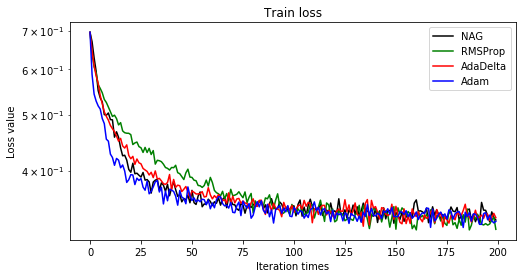

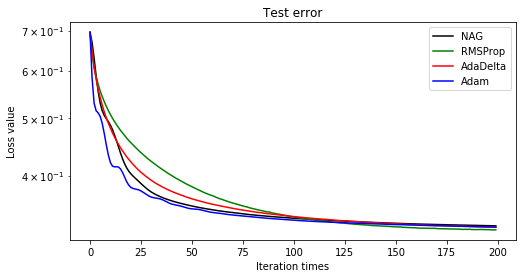

In [9]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.plot(loss_NAGhistory, 'black', label = 'NAG')
plt.plot(loss_RMSProphistory, 'green', label = 'RMSProp')
plt.plot(loss_AdaDeltahistory, 'red', label = 'AdaDelta')
plt.plot(loss_Adamhistory, 'blue', label = 'Adam')
plt.title('Train loss')
plt.yscale('log')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()

plt.plot(test_NAGhistory, 'black',label = 'NAG')
plt.plot(test_RMSProphistory, 'green', label = 'RMSProp')
plt.plot(test_AdaDeltahistory, 'red', label = 'AdaDelta')
plt.plot(test_Adamhistory, 'blue', label = 'Adam')
plt.title('Test error')
plt.yscale('log')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()